In [1]:
# All the imports we'll need
# You'll need to run all this from inside an ipython (or jupyter) notebook
from IPython.display import Audio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The following will produce 5 seconds of a simple sine wave:

In [2]:
framerate = 8000 # 8000 samples per second
freq = 220 # the frequency
length = 5 # 5s of sound

# The linspace function creates a list of evenly spaced decimals between 0s and 5s
# Enough for 8000 samples per second for 5s
xs = np.linspace(0,length,framerate*length)

# Create a sine wave, frequency 220 cycles per second
# 1 second should be 2pi radians
ys = np.sin(2*np.pi*freq*xs)

# Create the audio widget
Audio(ys,rate=framerate)

Let's make that more interesting by superimposing another sine wave at double the frequency

In [3]:
framerate = 8000 
freq = 220
length = 5 

# We still want the same time values
xs = np.linspace(0,length,framerate*length)

# But now we'll make two sine waves, one at 220 and one at 440
y1 = np.sin(2*np.pi*freq*xs)
y2 = np.sin(2*np.pi*2*freq*xs)
# Add them together, but divide by 2 to keep the same total amplitude (1)
ys = (y1+y2)/2

# Create the audio widget
Audio(ys,rate=framerate)

The timbre of different instruments is, in part, due to the presence of multiples of the fundamental frequency (harmonics). Changing the relative weights of the harmonics changes the timbre.

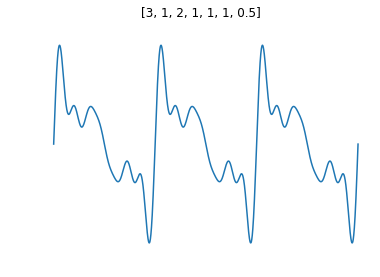

In [4]:
framerate = 8000
base = 220
# the relative amplitudes of eg 220,440,660,880
harmonics=[3,1,2,1,1,1,0.5]
length = 5

def wave(base_freq,sample_times,harmonics_list):
    # Eg [2sin(2pi220t)+sin(2pi440t)+sin(2pi660t)+sin(2pi880t)]/5
    return sum([amplitude*np.sin(2*np.pi*(multiple+1)*base_freq*sample_times) for multiple,amplitude in enumerate(harmonics_list)])/sum(harmonics)

# The actual series of time values for audio
xs = np.linspace(0,length,framerate*length)
# The waveform
ys = wave(base,xs,harmonics)

# A snapshot of the time values to visualise it
x = np.linspace(0,1/(2*np.pi),framerate)
# The wave for three seconds ready for plotting
y = wave(6*np.pi,x,harmonics)

fig, myaxes = plt.subplots(1,1)
fig.suptitle(harmonics)
myaxes.plot(x,y)
myaxes.set_axis_off()

Audio(ys,rate=framerate)

Frequency modulation is an effect where the frequency is itself varying over time. You can create some interesting effects this way.

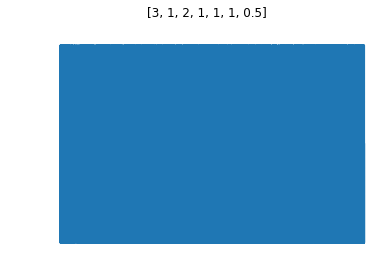

In [6]:
framerate = 8000
xs = np.linspace(0,10,framerate*10)
fmod = np.sin(2*np.pi*220*xs)
ys = np.sin(2*np.pi*(440+fmod)*xs)
Audio(ys,rate=framerate)
fig, myaxes = plt.subplots(1,1)
fig.suptitle(harmonics)
myaxes.plot(xs,ys)
myaxes.set_axis_off()